## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [3]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_UK = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_UK.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: UK


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,uk,01/01/1973,44.6,30.3,40.4,30.9,NaN,0.00,NaN,11.3,NaN,1.6,65.2,87.83,Partially cloudy
1,uk,01/02/1973,46.5,31.3,41.8,33.1,NaN,0.01,NaN,11.4,NaN,2.0,51.7,87.27,"Rain, Partially cloudy"
2,uk,01/03/1973,53.6,46.4,49.6,41.2,NaN,0.00,NaN,11.4,NaN,5.4,90.5,84.87,Overcast
3,uk,01/04/1973,51.9,45.7,50.4,47.4,NaN,0.00,0.0,5.6,NaN,1.3,97.5,90.75,Overcast
4,uk,01/05/1973,48.3,39.3,43.7,33.3,NaN,0.00,NaN,14.9,NaN,3.9,77.8,81.33,Overcast


### Random Slice of Data
<hr>

In [4]:
df_UK.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
7780,uk,04/22/1994,61.1,47.9,54.1,45.4,NaN,0.0,NaN,11.4,NaN,12.6,57.8,53.10,Partially cloudy
433,uk,03/10/1974,46.5,33.9,40.9,24.1,NaN,0.0,NaN,19.4,NaN,3.2,85.7,80.99,Overcast
2248,uk,02/27/1979,48.3,35.6,41.0,27.6,NaN,0.0,NaN,18.3,NaN,10.7,72.6,68.05,Partially cloudy
9470,uk,12/07/1998,44.9,33.2,40.2,28.7,NaN,0.0,NaN,8.0,NaN,6.4,90.2,74.58,Overcast
11547,uk,08/15/2004,76.2,62.3,68.3,NaN,NaN,0.0,NaN,11.4,NaN,18.3,74.8,72.03,Partially cloudy


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [5]:
df_UK.shape

(17472, 15)

In [6]:
#printing missing data sum
df_UK.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              8250
Heat Index             16927
Precipitation              0
Snow Depth             16662
Wind Speed                 0
Wind Gust              16218
Visibility                 0
Cloud Cover                1
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

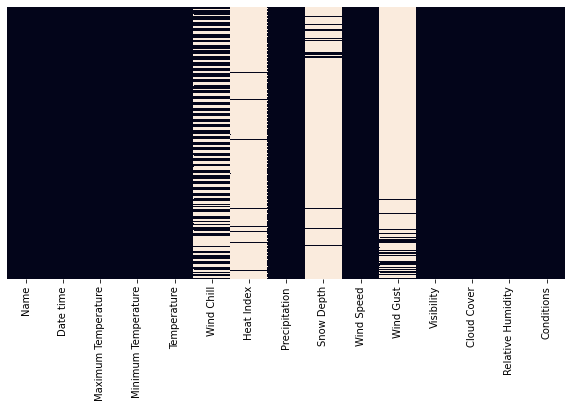

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_UK.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [8]:
df_UK.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)
df_UK = df_UK.dropna()

In [9]:
df_UK.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
17467,uk,10/30/2020,61.4,58.4,59.6,0.02,12.4,11.8,0.4,85.50,Rain
17468,uk,10/31/2020,60.0,51.9,56.3,0.30,17.7,12.8,2.2,81.39,Rain
17469,uk,11/01/2020,63.6,51.7,59.3,0.00,20.3,6.0,89.4,81.07,Overcast
17470,uk,11/02/2020,63.6,46.7,57.2,0.00,26.6,6.1,73.5,69.64,Partially cloudy
17471,uk,11/03/2020,51.4,43.0,47.3,0.00,21.0,6.1,66.4,74.40,Partially cloudy


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [10]:
#minimum value for temperature
df_UK['Temperature'].min()

20.0

In [11]:
#maximum value for temperature
df_UK['Temperature'].max()

84.5

In [12]:
#minimim value for temperature
df_UK['Precipitation'].min()

0.0

In [13]:
#maximum value for precipitation
df_UK['Precipitation'].max()

10.67

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [16]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_UK.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_UK['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [18]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_UK.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_UK['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

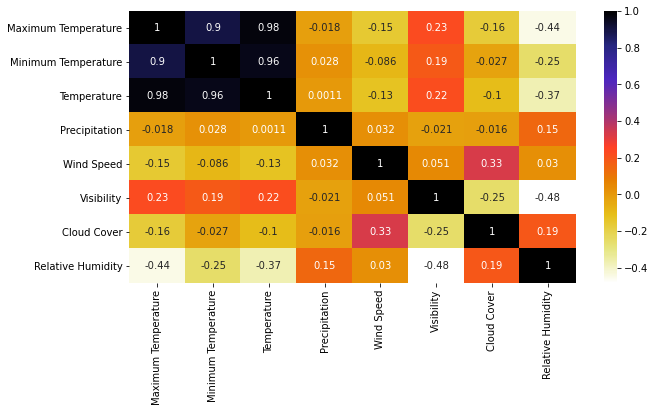

In [49]:
plt.figure(figsize=(10,5))
c= df_UK.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is inversely correlated with Realtive Humidity. Slightly correlated with Visibility, slight negative correlation with Wind Speed and Cloud Cover

For `Precipitation`, It is not not correlated with feature and these are negligible values

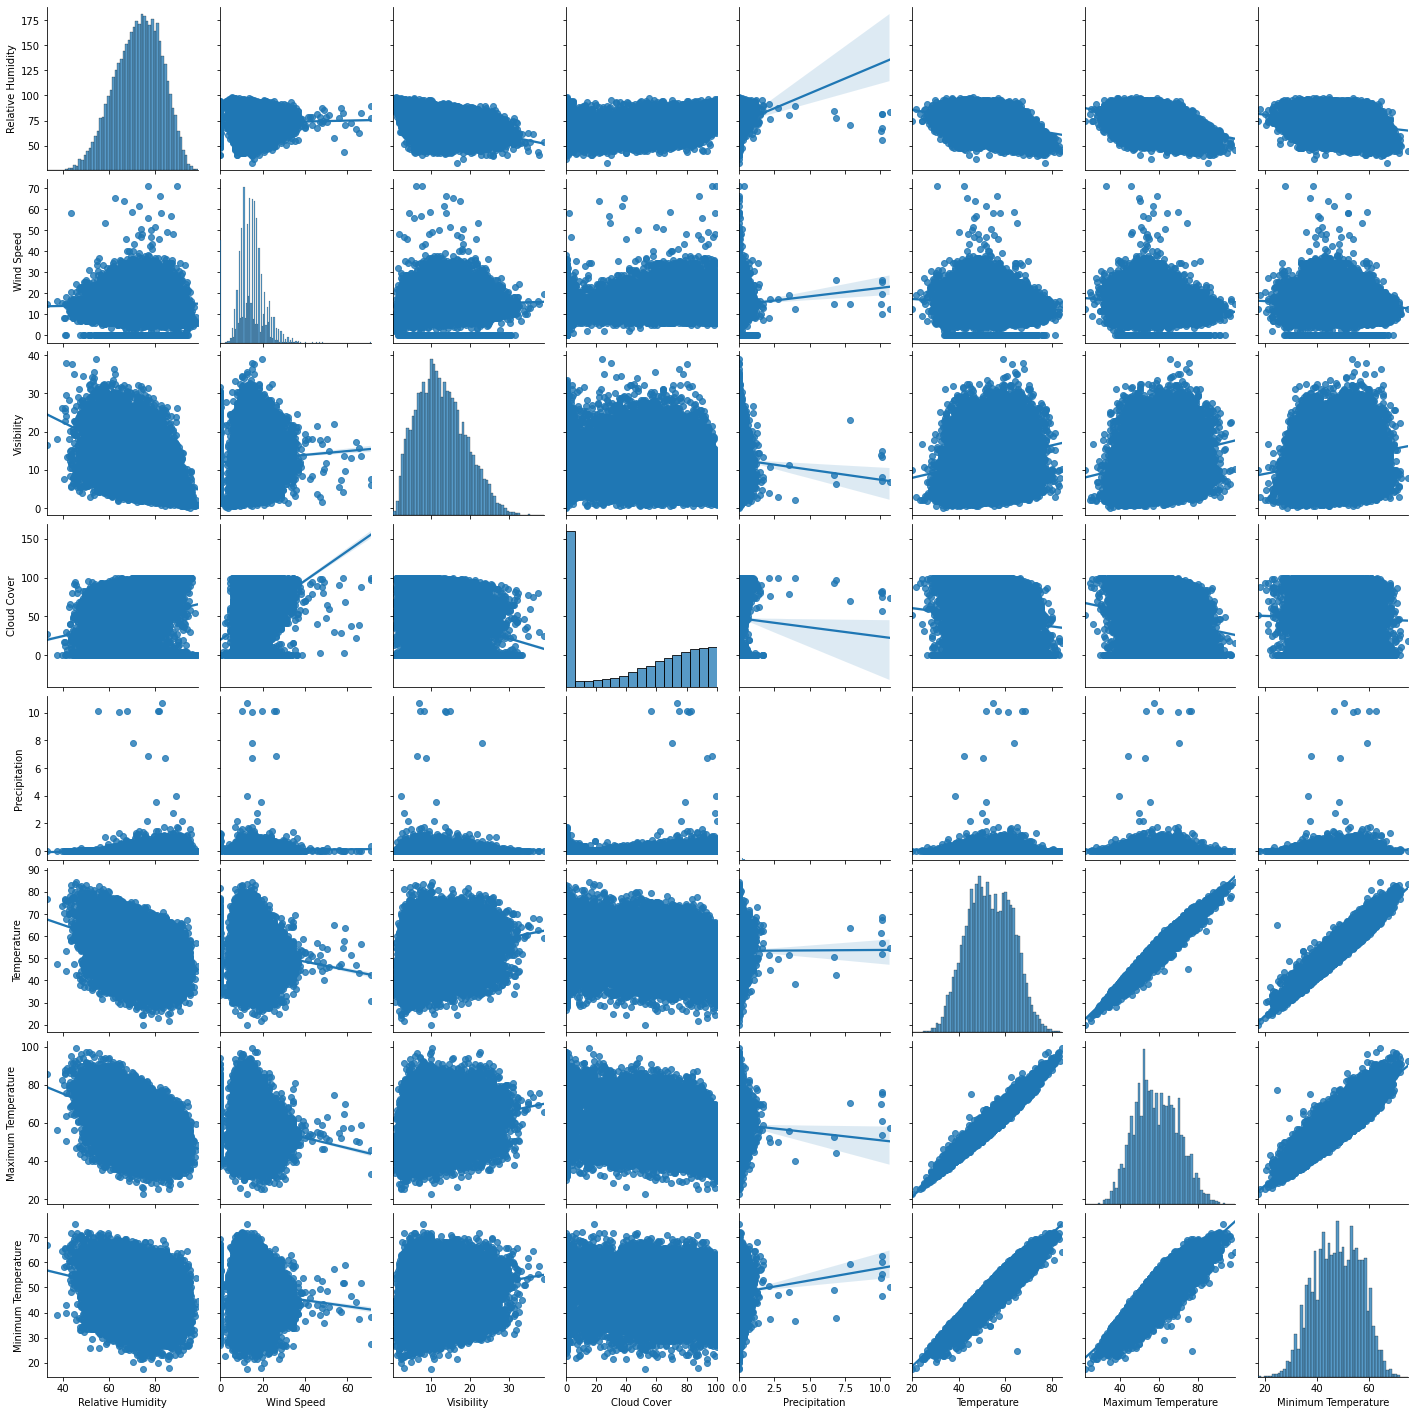

In [50]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_UK[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation expect for Relative Humidity , it is inverse

For Precipitation, We can see no relation with any other features. Most number of values for precipitation are in the range of 0-2 and constant for all feature values with few outliers

#### 3.3 Using Feature Transformation for conditions

In [20]:
df_UK['Conditions'] = df_UK['Conditions'].astype('category')

In [21]:
df_UK_conditions = pd.get_dummies(df_UK['Conditions'])

In [22]:
df_UK  = pd.concat([df_UK,df_UK_conditions],axis=1)

In [23]:
df_UK.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,uk,01/01/1973,44.6,30.3,40.4,0.00,11.3,1.6,65.2,87.83,Partially cloudy,0,0,1,0,0,0,0,0,0
1,uk,01/02/1973,46.5,31.3,41.8,0.01,11.4,2.0,51.7,87.27,"Rain, Partially cloudy",0,0,0,0,0,1,0,0,0
2,uk,01/03/1973,53.6,46.4,49.6,0.00,11.4,5.4,90.5,84.87,Overcast,0,1,0,0,0,0,0,0,0
3,uk,01/04/1973,51.9,45.7,50.4,0.00,5.6,1.3,97.5,90.75,Overcast,0,1,0,0,0,0,0,0,0
4,uk,01/05/1973,48.3,39.3,43.7,0.00,14.9,3.9,77.8,81.33,Overcast,0,1,0,0,0,0,0,0,0


## Regression

(array([  13.,  151., 1160., 2842., 4065., 3585., 3570., 1677.,  372.,
          36.]),
 array([20.  , 26.45, 32.9 , 39.35, 45.8 , 52.25, 58.7 , 65.15, 71.6 ,
        78.05, 84.5 ]),
 <BarContainer object of 10 artists>)

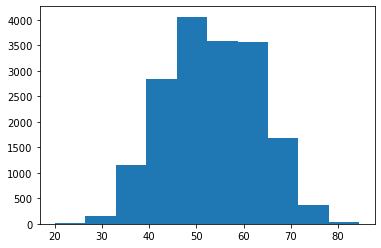

In [24]:
plt.hist(df_UK['Temperature'])

(array([1.7428e+04, 2.9000e+01, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([ 0.   ,  1.067,  2.134,  3.201,  4.268,  5.335,  6.402,  7.469,
         8.536,  9.603, 10.67 ]),
 <BarContainer object of 10 artists>)

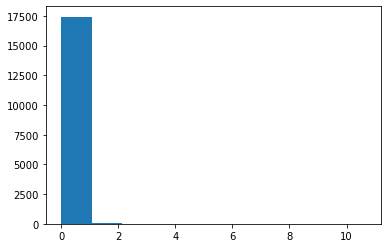

In [25]:
plt.hist(df_UK['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [130]:
X_temp=df_UK.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time','Cloud Cover','Wind Speed'],axis=1)
Y_temp=df_UK.Temperature

#### Importing the train test split function for Temperature

In [131]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp, test_size=0.35)

In [132]:
train_X_temp.head()

,Visibility,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
8892,14.4,73.62,0,0,0,0,1,0,0,0,0
4884,10.1,82.27,0,0,0,0,1,0,0,0,0
623,3.5,87.15,0,0,1,0,0,0,0,0,0
15394,13.3,81.59,0,0,0,1,0,0,0,0,0
7492,23.6,58.82,0,0,1,0,0,0,0,0,0


In [133]:
train_y_temp.head()

8892     47.7
4884     54.2
623      61.4
15394    48.7
7492     65.4
Name: Temperature, dtype: float64

In [134]:
#getting the shape for training data
train_X_temp.shape

(11356, 11)

In [135]:
train_y_temp.shape

(11356,)

In [136]:
#getting the shape for test data
test_X_temp.shape

(6115, 11)

### 1. Implementing Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
import math

In [138]:
lr = LR(normalize=True)
lr.fit(train_X_temp,train_y_temp)
y_pred_1=lr.predict(test_X_temp)

In [139]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_temp)
k = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(k) )

Training Root Mean Squared Error 8.759028011757465


In [140]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
k = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(k))

Test Root Mean Squared Error 8.718082583612118


### Ridge Regression

In [141]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_temp,train_y_temp)
y_predict=model.predict(test_X_temp)

In [142]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_temp)
ridge_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 8.759066262287316


In [143]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
ridge_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )
ridge_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Ridge regression',ridge_r2_score)

Test Root Mean Squared Error 8.718082583612118
R2 Square Error for Ridge regression 0.18174604835407315


### Residual Plot in Ridge Regression

Text(0.5, 1.0, 'Residual plot in Ridge Regression')

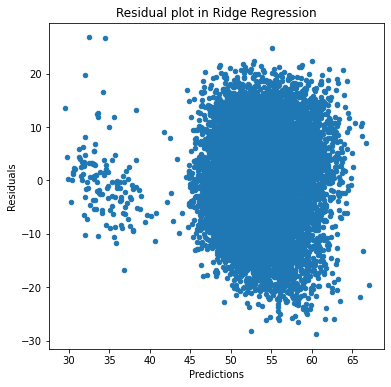

In [144]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Ridge Regression")

### Knn Algorithm

In [145]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Visibility','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Visibility','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Visibility','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Visibility','Relative Humidity']])

In [146]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_temp,train_y_temp)
y1_knn=knn.predict(test_X_temp)

In [147]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 7.632158427889476


In [148]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 9.289690146896586
R2 Square Error for KNN regression 0.07092962689026072


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

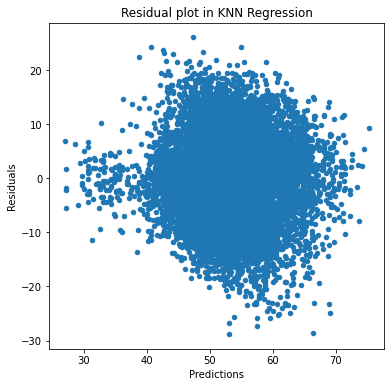

In [149]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [150]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X_temp,train_y_temp)

[23:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [151]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 8.480945817214497


In [152]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 8.607607038491567
R2 Square Error for Gradient Boosting regression 0.2023524821111936


### Decision Tree Regressor

In [153]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_temp,train_y_temp)

DecisionTreeRegressor(max_depth=1)

In [154]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 9.206135660635516


In [155]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 9.124960596324044
R2 Square Error for Decision Tree regression 0.10358699292399243


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

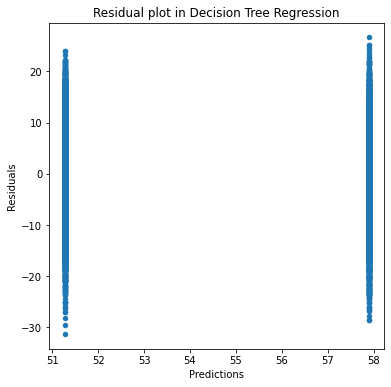

In [156]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

### 3. Support Vector Regression for Temperature

#### Pre processing features

In [157]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_temp,train_y_temp)
pred1=model1.predict(test_X_temp)

In [158]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 8.794742871053836


In [159]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 8.768284101186469
R2 Square Error for SVM regression 0.17229537873431788


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

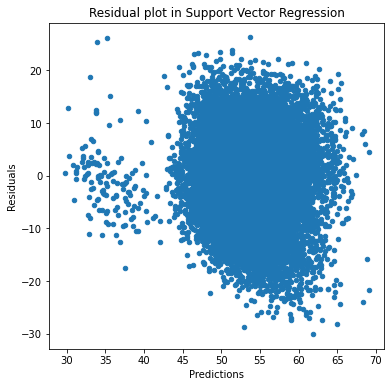

In [160]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [161]:
train_error=[ridge_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Gradient Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,8.759066,8.718083
K-Nearest,7.632158,9.289690
Gradient Boost,8.480946,8.607607
Decision Tree,9.206136,9.124961
SVM,8.794743,8.768284


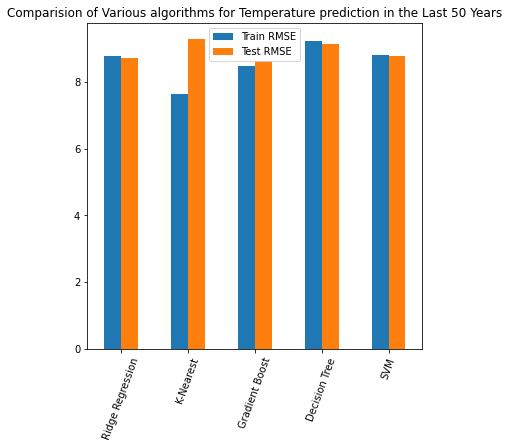

In [162]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [163]:
test_r2_square_error=[ridge_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square Error':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square Error
Ridge Regression,0.181746
K-Nearest,0.070930
Gradent Boost,0.202352
Decision Tree,0.103587
SVM,0.172295


Text(0.5, 1.0, 'R2 Square for Various Models')

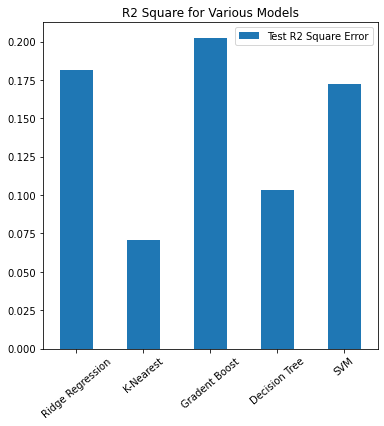

In [164]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [166]:
X_prec=df_UK.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time','Cloud Cover','Wind Speed','Visibility'],axis=1)
Y_prec=df_UK.Precipitation

In [167]:
X_prec.head()

,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,87.83,0,0,1,0,0,0,0,0,0
1,87.27,0,0,0,0,0,1,0,0,0
2,84.87,0,1,0,0,0,0,0,0,0
3,90.75,0,1,0,0,0,0,0,0,0
4,81.33,0,1,0,0,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [168]:
from sklearn.model_selection import train_test_split
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec, test_size=0.4)

### Ridge Regression

In [169]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_prec,train_y_prec)
y_predict=model.predict(test_X_prec)

In [170]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_prec)
ridge_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 0.24965955732437237


In [171]:
# Predicting over the Test Set and calculating error
test_predict = model.predict(test_X_prec)
ridge_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )

Test Root Mean Squared Error 0.22864532362274145


### Knn Algorithm

In [172]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

KeyError: "['Cloud Cover', 'Wind Speed', 'Visibility'] not in index"

In [173]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [174]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 0.22271071159028294


In [175]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 0.2473862854833358


### Decision Tree Regressor

In [176]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [177]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 0.25578984502523666


In [178]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error))

Test Root Mean Squared Error 0.2357930441620076


### Gradient Boosting Regressor

In [179]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[23:42:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [180]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 0.1955810815360842


In [181]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 0.24107604104441718


###  Support Vector Regression for Precipitation

In [183]:
from sklearn.svm import SVR

model1=SVR()

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [184]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 0.259965728846222


In [185]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error))

Test Root Mean Squared Error 0.2400570778276721


### Getting the Graph for all Models RMSE

In [186]:
train_error=[ridge_train_error,knn_train_error,dec_train_error,svm_train_error,xgb_train_error]
test_error=[ridge_test_error,knn_test_error,dec_test_error,svm_test_error,xgb_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Decision Tree','SVM','Gradient Boost']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,0.249660,0.228645
K-Nearest,0.222711,0.247386
Decision Tree,0.255790,0.235793
SVM,0.259966,0.240057
Gradient Boost,0.195581,0.241076


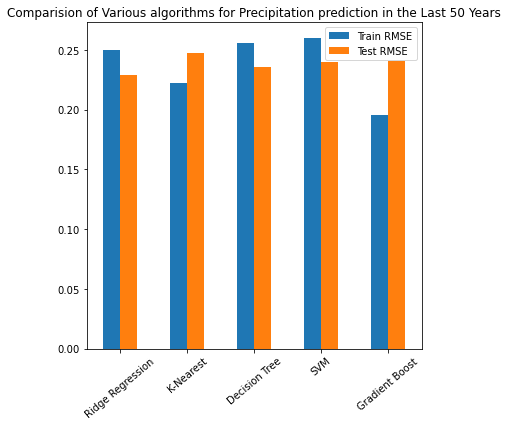

In [187]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.show()